## Discrete Fourier Transform
$$
\begin{align}
c_k &= \sum_{n=0}^{N-1}y_n\exp\left(-i\frac{2\pi k n}{N}\right) \\ 
y_n &= \frac{1}{N}\sum_{k=0}^{N-1}c_k\exp\left(i \frac{2\pi k n}{N}\right)
\end{align}
$$
where $y_n$ are the sample points and $c_k$ the Fourier coefficients. $0\leq k < N$. Note that $y_n = f(x_n)$ where $x_n = nL/N$, $N$ the number of slices, $L$ the length of the interval. The function is assumed to be $L$-periodic.

In [3]:
import numpy as np
from math import exp, pi

In [4]:
def dft_coef(y):
    '''Calculates the discrete Fourier transform coefficients for N real samples in y'''
    N = len(y)
    coeff_array=np.zeros(N//2+1, complex)
    for k in range(N//2 + 1):
        array_factors=[y[n]*np.exp(-1j*2*pi*k*n/N) for n in range(N)]
        coeff_array[k] = sum(array_factors)   
    return coeff_array

When the sample points are shifted, that is, $x_n' = x_n + \Delta = nL/N + \Delta$, 
$$\begin{align*}
c_k &= \exp\left(-i \frac{2\pi k\Delta}{L}\right)\sum_{n=0}^{N-1}y_n'\exp\left(-i\frac{2\pi k n}{N}\right) \\ 
&= \exp\left(-i \frac{2\pi k\Delta}{L}\right)c_k'
\end{align*}$$
where 
$$\begin{align*}
c_k' = \sum_{n=0}^{N-1}y_n'\exp\left(-i\frac{2\pi k n}{N}\right)
\end{align*}$$
The DFT coefficients change only by a phase factor. Nothing else changes.

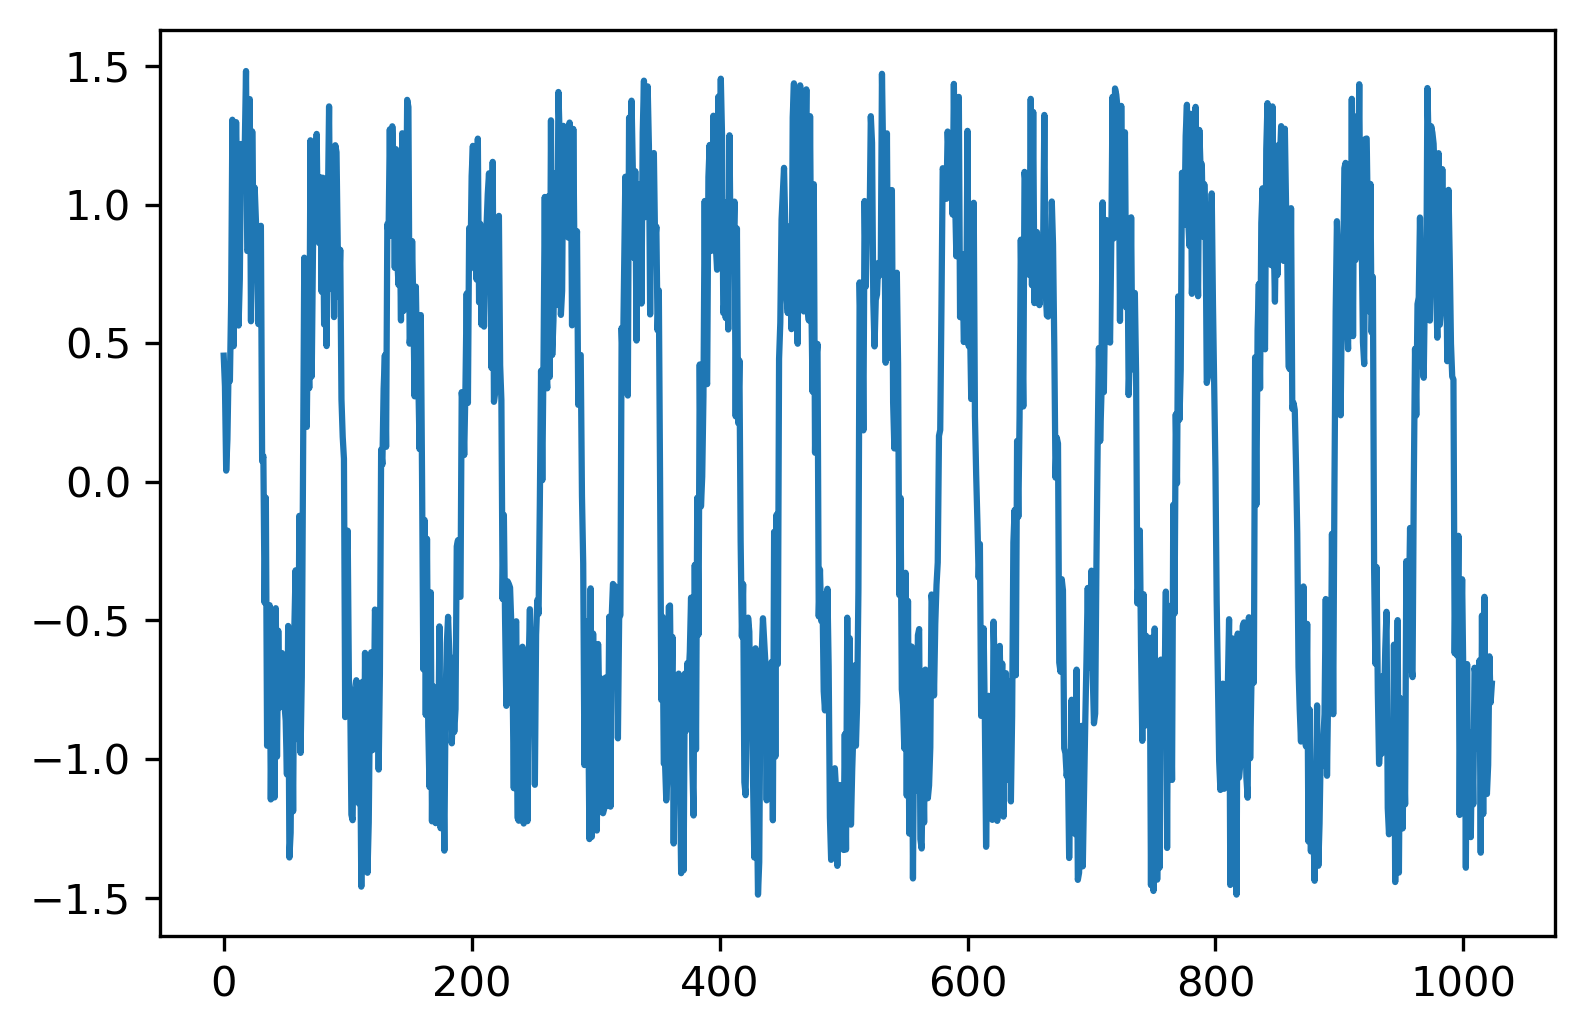

In [11]:
from pylab import plot,xlim,show 
import matplotlib.pyplot as plt

y=np.loadtxt('pitch.txt', float)
x=[i for i in range(len(y))]
plt.figure(dpi=300)
plt.plot(x,y)
c=dft_coef(y)


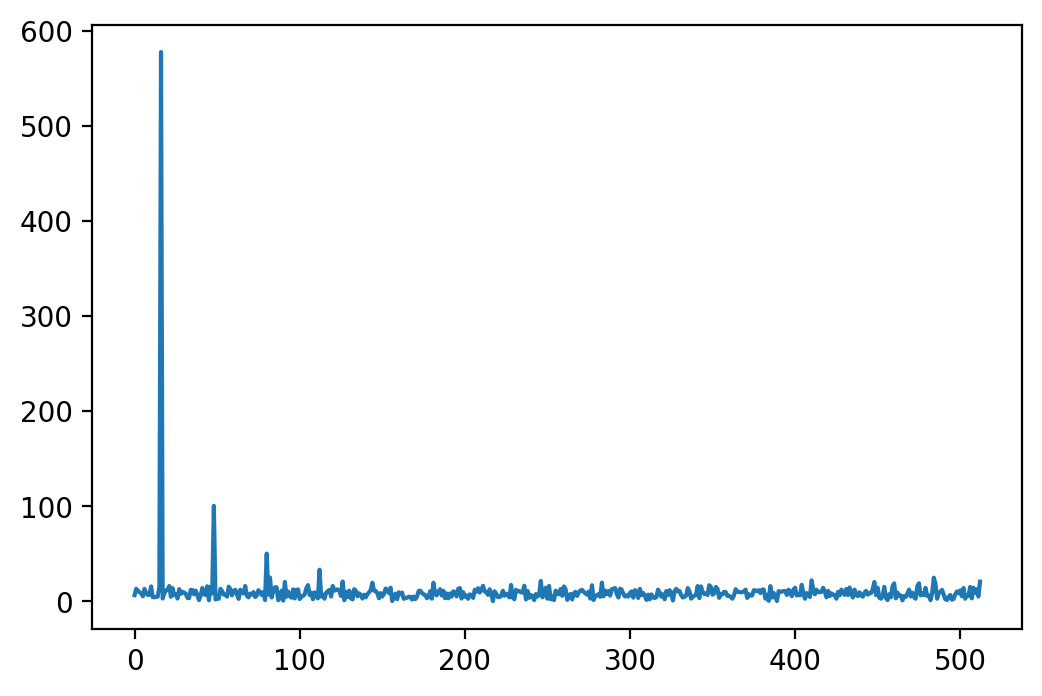

In [18]:
plt.figure(dpi=200)
plt.plot(x[0:len(c)],abs(c))

In [17]:
max(abs(c))

577.6423019140725

Fourier filtering and smoothing

In [2]:
import numpy as np 
import matplotlib.pyplot as plt
from numpy.fft import rfft, irfft 

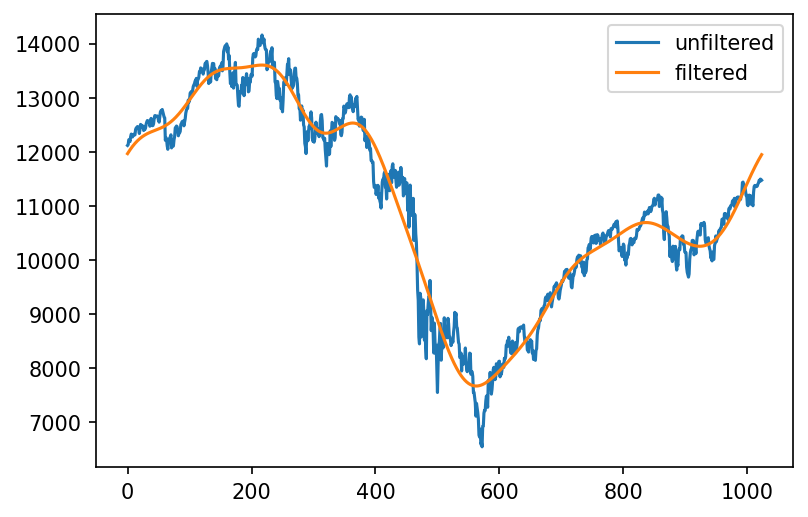

In [83]:
dow = np.loadtxt('dow.txt', float)
plt.figure(dpi=150)
plt.plot(dow, label='unfiltered')

N=2
dow_rfft = rfft(dow)
dow_rfft[len(dow_rfft)//(100//N)::]=0
filtered = irfft(dow_rfft)
plt.plot(filtered, label='filtered')
plt.legend(loc='best')


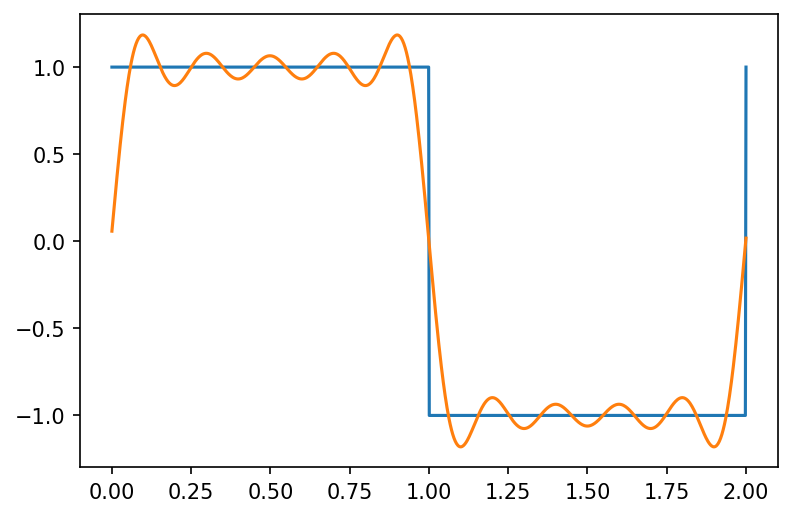

In [95]:
def sig_gen(x):
    X=x.copy()
    X[np.floor(X)%2==1], X[np.floor(X)%2==0] = -1,1
    return X

x=np.linspace(0,2,1000)
y=sig_gen(x) #square-wave function
plt.figure(dpi=150)
plt.plot(x,y)


N=10
y_rfft=rfft(y)
y_rfft[N::]=0
filtered = irfft(y_rfft)
plt.plot(x, filtered)

In [ ]:
from numpy.fft import rfft, irfft 
x=np.linspace(0,2,1000)
y=sig_gen(x) #square-wave function
y_rfft=rfft(y)
y_rfft[10::]=0
filtered = irfft(y_rfft)